# Histogram
Tahmini süre: 45 dakika

Bu laboratuvar çalışmasında, verilerin görselleştirilmesine odaklanacaksınız. Veri seti bir RDBMS aracılığıyla sağlanacak ve gerekli verileri çıkarmak için SQL sorguları kullanmanız gerekecektir.

# Amaçlar
Bu laboratuvar çalışmasında şunları gerçekleştireceksiniz:

Histogramlar kullanarak veri dağılımını görselleştirmek.

Özellikler arasındaki ilişkileri görselleştirmek.

Veri bileşimini ve karşılaştırmalarını incelemek.

# Demo: Veritabanıyla Çalışma
***Veritabanı dosyasını indirin.***

In [2]:
!wget -O survey-data.sqlite https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2026-01-28 08:10:09--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-data.sqlite’

survey-data.sqlite  100%[===================>] 201.62M  53.4MB/s    in 3.9s    

2026-01-28 08:10:14 (52.0 MB/s) - ‘survey-data.sqlite’ saved [211415040/211415040]



***Gerekli kütüphaneleri kurun ve içe aktarın.***

In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 123.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 197.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 126.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 157.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 85.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 158.5 MB/s eta 0:00:00


***SQLite veritabanına bağlanın***

In [2]:
conn = sqlite3.connect('survey-data.sqlite')

# Demo: Temel SQL sorguları
Demo 1: Tablodaki satır sayısını sayma

In [3]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)

   COUNT(*)
0     65437


***Demo 2: Tüm tabloları listele***

In [4]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)

,Table_Name
0,main


***Demo 3: Verileri yaşa göre gruplandırma***

In [5]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)

                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568



# Uygulamalı Laboratuvar: Histogramlarla Verileri Görselleştirme
***1. Verilerin dağılımını görselleştirme (Histogramlar)***
-***1.1 Toplam Tazminatın Histogramı***  CompTotal (Total Compensation)

Amaç: Katılımcıların toplam ücretlerinin dağılımını görselleştirmek için CompTotal'ın histogramını çizmek.

 veritabanı doğrudan SQL üzerinden sorgulandığı için, verileri çekip doğrudan görselleştireceğiz.

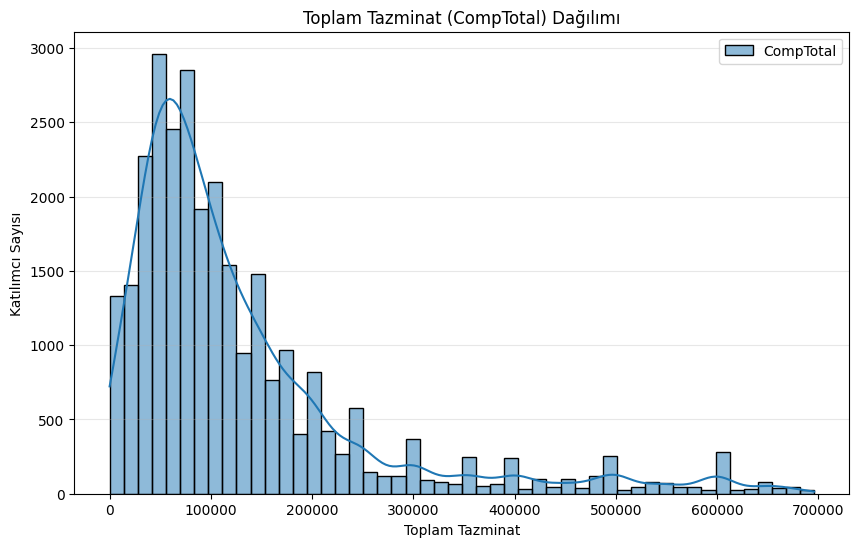

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. SQL sorgusu ile CompTotal verilerini çekelim
QUERY = """
SELECT CompTotal 
FROM main 
WHERE CompTotal IS NOT NULL
"""
df_comp = pd.read_sql_query(QUERY, conn)

# 2. Görselleştirme
plt.figure(figsize=(10, 6))
sns.histplot(data = df_comp[df_comp['CompTotal'] < 700000], bins=50, color='skyblue', kde=True)

plt.title('Toplam Tazminat (CompTotal) Dağılımı')
plt.xlabel('Toplam Tazminat')
plt.ylabel('Katılımcı Sayısı')
plt.grid(axis='y', alpha=0.3)
plt.show()

***1.2 YearsCodePro (Profesyonel Kodlama Deneyimi Yılları) Histogramı***

Amaç: Katılımcılar arasında kodlama deneyiminin dağılımını analiz etmek için YearsCodePro'nun histogramını çizmek.

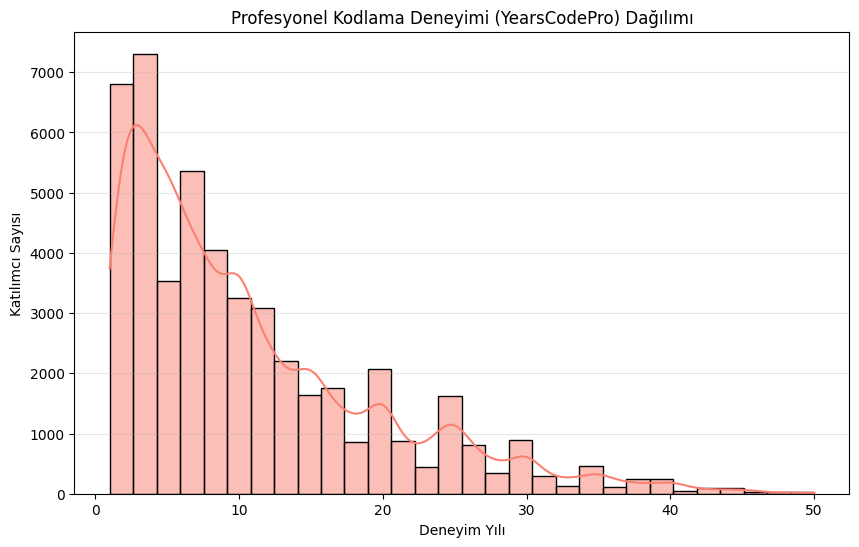

In [26]:
# 1. SQL sorgusu ile YearsCodePro verilerini çekelim
QUERY = """
SELECT YearsCodePro 
FROM main 
WHERE YearsCodePro IS NOT NULL
"""
df_pro = pd.read_sql_query(QUERY, conn)

# 2. Veriyi sayısal hale getirelim (Hatalı verileri temizleyerek)
df_pro['YearsCodePro'] = pd.to_numeric(df_pro['YearsCodePro'], errors='coerce')
df_pro.dropna(inplace=True)

# 3. Görselleştirme
plt.figure(figsize=(10, 6))
sns.histplot(df_pro['YearsCodePro'], bins=30, color='salmon', kde=True)

plt.title('Profesyonel Kodlama Deneyimi (YearsCodePro) Dağılımı')
plt.xlabel('Deneyim Yılı')
plt.ylabel('Katılımcı Sayısı')
plt.grid(axis='y', alpha=0.3)
plt.show()

## 2. Verilerdeki İlişkilerin Görselleştirilmesi
***2.1 Yaş Gruplarına Göre CompTotal'ın Histogram Karşılaştırması***

Amaç: Histogramları kullanarak CompTotal'ın farklı yaş gruplarındaki dağılımını karşılaştırmak.

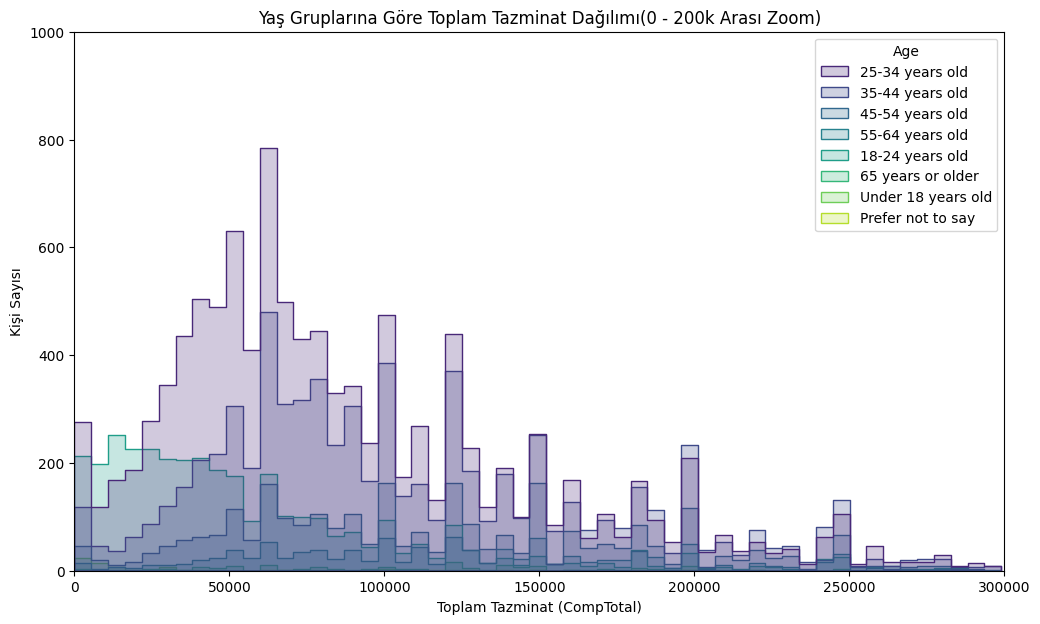

In [19]:

# 1. Verileri çekelim
QUERY = """
SELECT Age, CompTotal 
FROM main 
WHERE Age IS NOT NULL AND CompTotal IS NOT NULL
"""
df_comp_age = pd.read_sql_query(QUERY, conn)

# 2. Görselleştirme
plt.figure(figsize=(12, 7))

# Histogramda yaş gruplarını renklerle ayıralım (hue)
# element='step' grafiğin daha temiz görünmesini sağlar
# Sadece 200.000 altına odaklanalım ki dağılımı görelim
sns.histplot(data=df_comp_age[df_comp_age['CompTotal'] < 300000], 
             x='CompTotal', hue='Age', element='step', palette='viridis')

# Maaş verisi çok uç değerlere sahipse grafiği belli bir aralıkta sınırlayabiliriz (Örn: ilk 200.000)
plt.xlim(0, 300000) 
plt.ylim(0, 1000)
plt.title('Yaş Gruplarına Göre Toplam Tazminat Dağılımı(0 - 200k Arası Zoom)')
plt.xlabel('Toplam Tazminat (CompTotal)')
plt.ylabel('Kişi Sayısı')
plt.show()

***2.2 Farklı Yaş Grupları İçin Arama Süresinin Histogramı(TimeSearching)***

Amaç: Histogramları kullanarak, farklı yaş gruplarındaki katılımcılar için arama süresinin (bilgi aramak için harcanan zaman) dağılımını incelemek.(Amaç: Histogramları kullanarak, farklı yaş gruplarındaki katılımcılar için arama süresinin (bilgi aramak için harcanan zaman) dağılımını incelemek.())

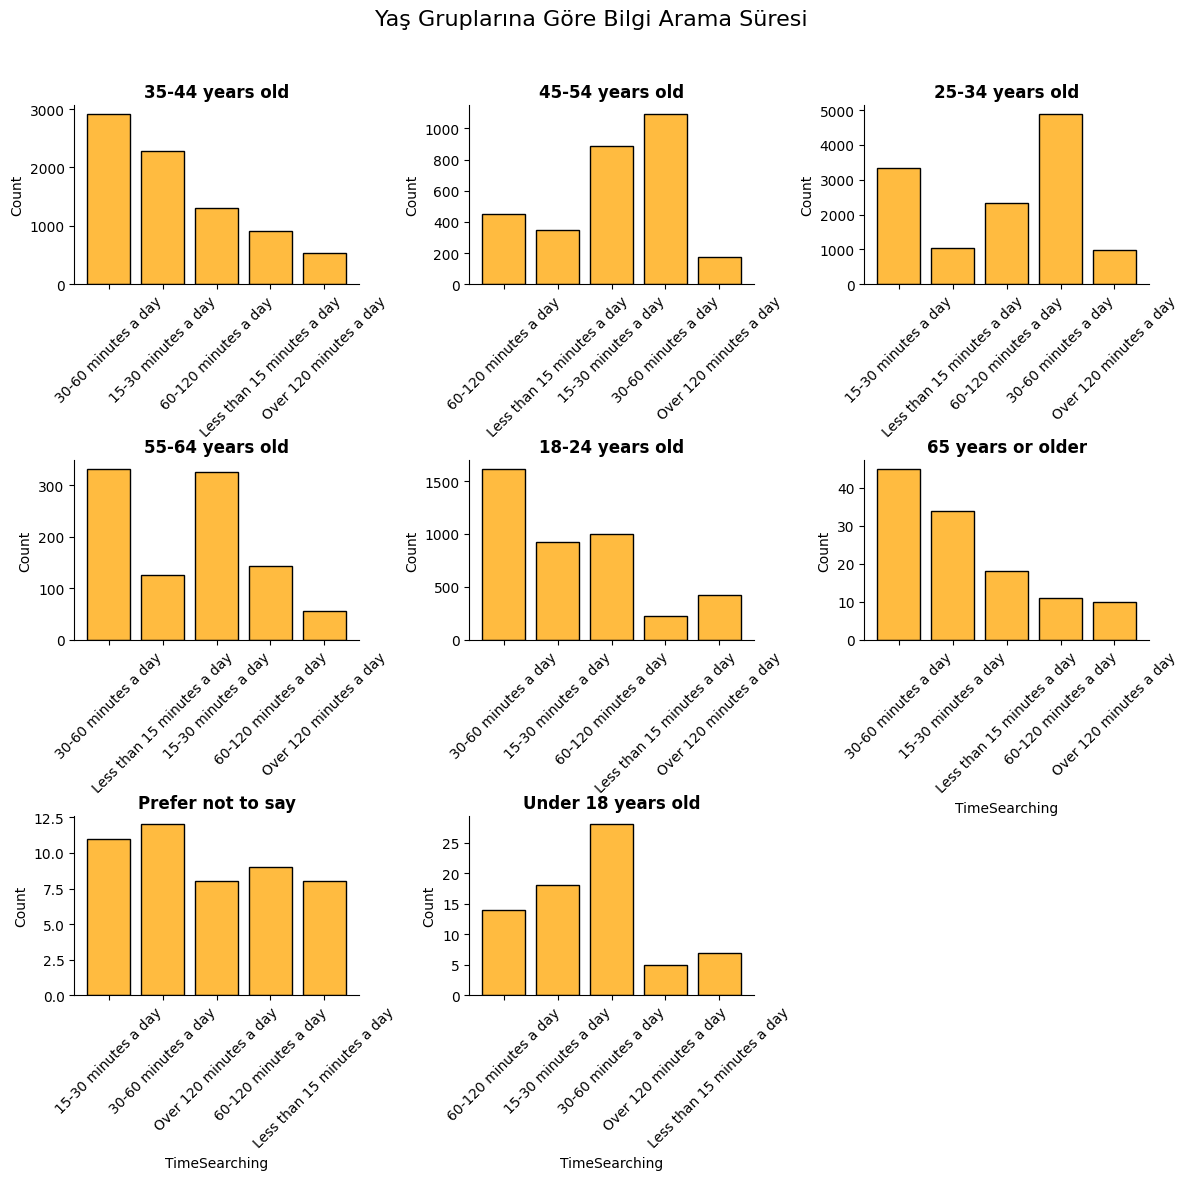

In [41]:
# 1. Veriyi çekelim (Bağlantının açık olduğunu varsayıyorum)
QUERY = "SELECT Age, TimeSearching FROM main WHERE Age IS NOT NULL AND TimeSearching IS NOT NULL"
df_search = pd.read_sql_query(QUERY, conn)

# 2. Görselleştirme: sharey=False (Y eksenini her yaş grubu için serbest bırakır)
# Böylece az kişi olan yaş gruplarının sütunları da dev gibi görünür!
g = sns.FacetGrid(df_search, col="Age", col_wrap=3, height=4, sharex=False, sharey=False)

# Sütunları daha geniş (shrink=0.8) ve kenarlıklı yapalım
g.map(sns.histplot, "TimeSearching", color='orange', shrink=0.8)

# Her bir küçük grafiğin (subplot) ayarını yapalım
for ax in g.axes.flat:
    # X ekseni yazılarını her grafiğin altına ekle ve 45 derece döndür
    ax.tick_params(labelbottom=True)
    for label in ax.get_xticklabels():
        label.set_rotation(45)
    
    # Başlıkları daha okunaklı yapalım (Age= kısmını silelim)
    title = ax.get_title().replace("Age = ", "")
    ax.set_title(title, fontweight='bold')

g.fig.tight_layout()
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Yaş Gruplarına Göre Bilgi Arama Süresi ', fontsize=16)

plt.show()

--sharey=False: Artık 65 yaşındaki 10 kişi ile 25 yaşındaki 10.000 kişiyi kıyaslarken, her ikisinin de dağılımını kendi içinde net görecez.Sütunlar artık "görünmüyor" olmayacak.
--labelbottom=True: Her bir küçük kutucuğun altına "30-60 minutes" gibi yazıları tek tek ekledik.
--shrink=0.8: Sütunlar arasına boşluk koyduk ki birbirine girmesinler.

# 3. Veri Bileşiminin Görselleştirilmesi
***3.1 En Çok İstenen Veritabanlarının Histogramı (Çalışmak İstediğim Veritabanı)(DatabaseWantToWorkWith)***

Amaç: Gelecekteki öğrenme için en çok istenen veritabanlarını, ilk 5 veritabanının histogramını kullanarak görselleştirmek.

  DatabaseWantToWorkWith  count
0             PostgreSQL  24005
1                 SQLite  13489
2                  MySQL  12269
3                MongoDB  10982
4                  Redis  10847


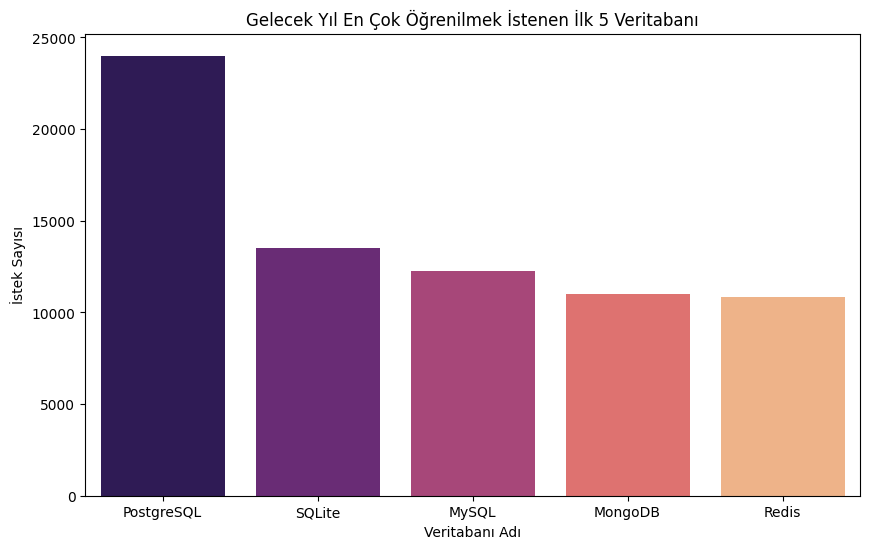

In [54]:

# 1. Veriyi SQL'den çekelim
QUERY = "SELECT DatabaseWantToWorkWith FROM main WHERE DatabaseWantToWorkWith IS NOT NULL"
df_db = pd.read_sql_query(QUERY, conn)

# 2. Verileri ayırıp (split) sayalım
# Her satırdaki dilleri ayırıp alt alta listeliyoruz ve ilk 5'i alıyoruz
db_series = df_db['DatabaseWantToWorkWith'].str.split(';').explode()
df_top5_db = db_series.value_counts().head(5).reset_index()
print(df_top5_db)
df_top5_db.columns = ['Database', 'Count']

# 3. Görselleştirme
plt.figure(figsize=(10, 6))
sns.barplot(x='Database', y='Count', hue='Database' , data=df_top5_db, palette='magma')

plt.title('Gelecek Yıl En Çok Öğrenilmek İstenen İlk 5 Veritabanı')
plt.xlabel('Veritabanı Adı')
plt.ylabel('İstek Sayısı')
plt.show()

***3.2 Tercih Edilen Çalışma Yerlerinin Histogramı (Uzaktan Çalışma)(RemoteWork)***

Amaç: Tercih edilen çalışma düzenlerinin (uzaktan çalışma) dağılımını incelemek için bir histogram kullanmak.

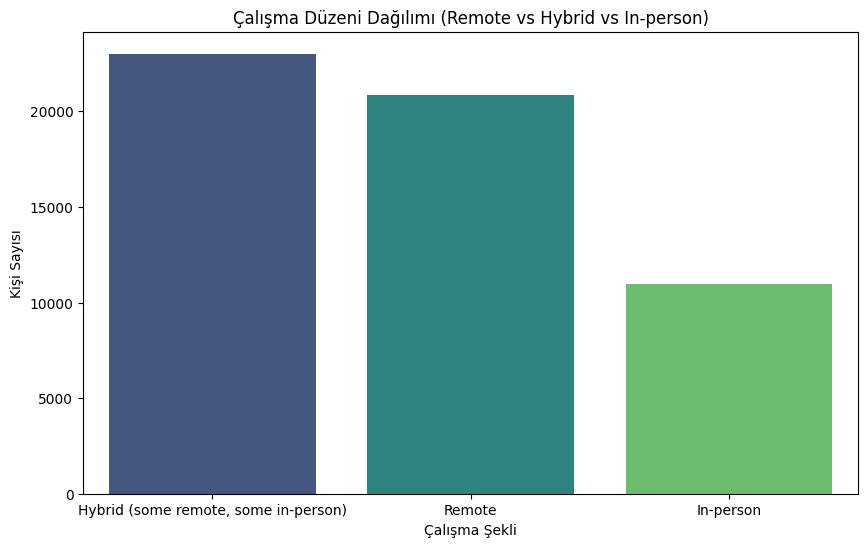

In [53]:
# 1. SQL ile RemoteWork verilerini ve sayılarını çekelim
QUERY = """
SELECT RemoteWork, COUNT(*) as Count 
FROM main 
WHERE RemoteWork IS NOT NULL
GROUP BY RemoteWork
ORDER BY Count DESC
"""
df_remote = pd.read_sql_query(QUERY, conn)

# 2. Görselleştirme
plt.figure(figsize=(10, 6))
# Kategorik bir "histogram" (çubuk grafik) oluşturuyoruz
sns.barplot(x='RemoteWork', y='Count', hue='RemoteWork', legend=False, data=df_remote, palette='viridis')

plt.title('Çalışma Düzeni Dağılımı (Remote vs Hybrid vs In-person)')
plt.xlabel('Çalışma Şekli')
plt.ylabel('Kişi Sayısı')
plt.show()

# 4. Verilerin Karşılaştırılmasının Görselleştirilmesi
***4.1 45-60 Yaş Arası İçin Medyan Toplam Ücret Histogramı***

Amaç: Orta kariyerdeki katılımcılar arasında ücret dağılımını analiz etmek için 45-60 yaş grubundaki toplam ücret histogramını çizmek.

CompTotal
150000.0     196
100000.0     191
200000.0     154
120000.0     154
60000.0      116
            ... 
192400.0       1
262000.0       1
206000.0       1
12500.0        1
2070000.0      1
Name: count, Length: 680, dtype: int64


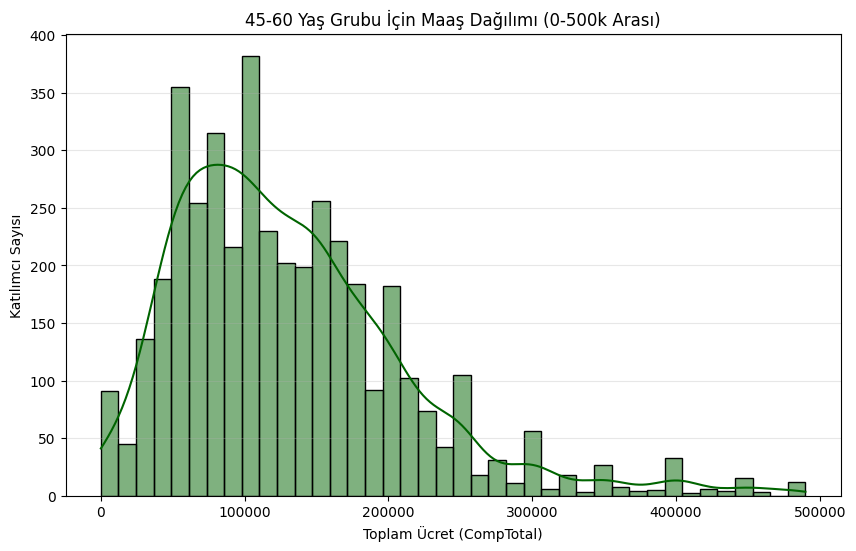

In [73]:

# 1. 45-60 yaş aralığını filtreleyen SQL sorgusu
QUERY = """
SELECT CompTotal 
FROM main 
WHERE Age IN ('45-54 years old', '55-64 years old') 
AND CompTotal IS NOT NULL
"""
df_mid_career = pd.read_sql_query(QUERY, conn)
print(df_mid_career.value_counts())


# 1. Önce 500.000'den küçük olan verileri ayıklayalım (Filtreleme)
df_filtered = df_mid_career[df_mid_career['CompTotal'] < 500000]

# 2. Şimdi bu filtrelenmiş verinin İÇİNDEKİ CompTotal sütununu çizelim
plt.figure(figsize=(10, 6))
sns.histplot(df_filtered['CompTotal'], bins=40, color='darkgreen', kde=True)

plt.title('45-60 Yaş Grubu İçin Maaş Dağılımı (0-500k Arası)')
plt.xlabel('Toplam Ücret (CompTotal)')
plt.ylabel('Katılımcı Sayısı')
plt.grid(axis='y', alpha=0.3)
plt.show()

***4.2 YearsCodePro ile İş Memnuniyeti Histogramı (JobSat)**

Amaç: Katılımcıların profesyonel kodlama deneyim yıllarına göre JobSat puanlarının histogramını çizmek.

JobSat
8.0     7325
7.0     6243
6.0     3651
9.0     3557
10.0    2196
5.0     1869
3.0     1141
4.0     1097
2.0      736
0.0      284
1.0      257
Name: count, dtype: int64


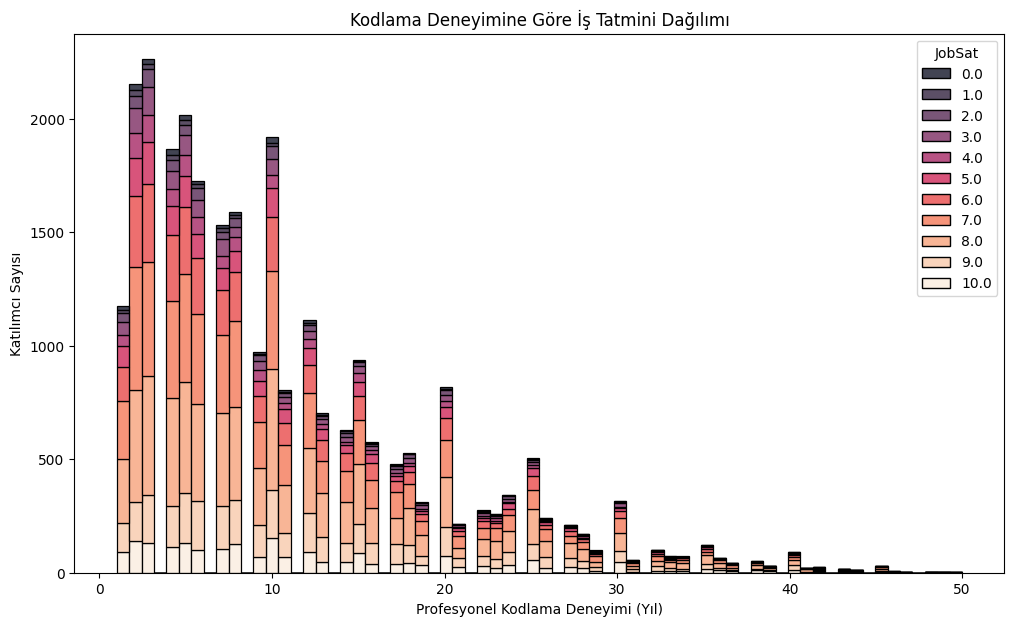

In [65]:
# 1. Gerekli verileri çekelim
QUERY = """
SELECT YearsCodePro, JobSat 
FROM main 
WHERE YearsCodePro IS NOT NULL AND JobSat IS NOT NULL
"""
df_sat = pd.read_sql_query(QUERY, conn)
print(df_sat['JobSat'].value_counts())

# 2. YearsCodePro sütununu sayıya çevirelim
df_sat['YearsCodePro'] = pd.to_numeric(df_sat['YearsCodePro'], errors='coerce')
df_sat.dropna(subset=['YearsCodePro'], inplace=True)

# 3. Görselleştirme: İş tatminine göre renklendirilmiş deneyim yılı dağılımı
plt.figure(figsize=(12, 7))
sns.histplot(data=df_sat, x='YearsCodePro', hue='JobSat', multiple='stack', palette='rocket')  #stacked yığılmış

plt.title('Kodlama Deneyimine Göre İş Tatmini Dağılımı')
plt.xlabel('Profesyonel Kodlama Deneyimi (Yıl)')
plt.ylabel('Katılımcı Sayısı')
plt.show()

In [ ]:
#sotunlar solda uzun cunkukişi sayısı orda cok
#basşta yenicalısanlar da mutsuz koyular da  cok giderek azıkıyor

In [74]:
conn.close()

Özet
Bu laboratuvar çalışmasında, veri setinin çeşitli yönlerini görselleştirmek için histogramlar kullandınız ve şunlara odaklandınız:

Ücret dağılımı, kodlama deneyimi ve çalışma saatleri.

Yaş grupları ve çalışma durumu genelinde ücretlendirmedeki ilişkiler.

İstenen veritabanları ve çalışma ortamlarına göre verilerin bileşimi.

Deneyim yılları genelinde iş memnuniyetinin karşılaştırılması.

Histogramlar, verilerdeki kalıpları ve dağılımları ortaya çıkarmaya yardımcı olarak geliştirici demografisi ve tercihleri ​​hakkındaki anlayışınızı geliştirir.